In [178]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import geopandas as gpd
from geopy.geocoders import Nominatim
import requests
import json
import numpy as np
from api_key import map_api_key

In [10]:
file = "house_values_by_zip.csv"
house_values_by_zip = pd.read_csv(file)
house_values_by_zip.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,111866.741314,...,273222.413831,277033.628170,279962.717673,281496.578812,281690.364813,281092.699344,280107.886185,278548.848440,276753.497813,275214.554308
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,220534.092937,...,473548.073978,479717.179175,483459.280358,484186.390092,482706.577301,481032.678096,479634.201740,477666.007240,475470.186757,474347.550074
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,92655.349036,...,181360.819505,183535.390170,185482.635258,187018.192868,188056.300032,188798.110684,189557.624171,190082.494270,191041.111960,192184.530382
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,72948.673936,...,325553.208878,326102.856651,326366.813599,325633.363288,323904.899569,322045.051381,321395.145617,320127.893337,320087.471953,320670.135773
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,234929.452170,...,741858.194383,749606.647715,754899.586478,756155.905939,753092.879612,750451.458241,748582.920489,745102.938136,741891.991122,737817.616928


In [11]:
#delete columns that are before 2018
for i, col in enumerate(house_values_by_zip.columns):
    print("Column {}: {}".format(i, col))

Column 0: RegionID
Column 1: SizeRank
Column 2: RegionName
Column 3: RegionType
Column 4: StateName
Column 5: State
Column 6: City
Column 7: Metro
Column 8: CountyName
Column 9: 2000-01-31
Column 10: 2000-02-29
Column 11: 2000-03-31
Column 12: 2000-04-30
Column 13: 2000-05-31
Column 14: 2000-06-30
Column 15: 2000-07-31
Column 16: 2000-08-31
Column 17: 2000-09-30
Column 18: 2000-10-31
Column 19: 2000-11-30
Column 20: 2000-12-31
Column 21: 2001-01-31
Column 22: 2001-02-28
Column 23: 2001-03-31
Column 24: 2001-04-30
Column 25: 2001-05-31
Column 26: 2001-06-30
Column 27: 2001-07-31
Column 28: 2001-08-31
Column 29: 2001-09-30
Column 30: 2001-10-31
Column 31: 2001-11-30
Column 32: 2001-12-31
Column 33: 2002-01-31
Column 34: 2002-02-28
Column 35: 2002-03-31
Column 36: 2002-04-30
Column 37: 2002-05-31
Column 38: 2002-06-30
Column 39: 2002-07-31
Column 40: 2002-08-31
Column 41: 2002-09-30
Column 42: 2002-10-31
Column 43: 2002-11-30
Column 44: 2002-12-31
Column 45: 2003-01-31
Column 46: 2003-02-

In [12]:
house_values_2018_2023 = house_values_by_zip.drop(house_values_by_zip.iloc[:,9:225], axis=1)
house_values_2018_2023[house_values_2018_2023['CountyName'] == "San Francisco County"]

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2018-01-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
60,97567,60,94112,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,9.741744e+05,...,1.180449e+06,1.175436e+06,1.163572e+06,1.145611e+06,1.125003e+06,1.106909e+06,1.091036e+06,1.076806e+06,1.067184e+06,1.054970e+06
152,97565,152,94110,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,1.350508e+06,...,1.467983e+06,1.454308e+06,1.433074e+06,1.403490e+06,1.370913e+06,1.341495e+06,1.316538e+06,1.294348e+06,1.274899e+06,1.255267e+06
352,97576,352,94122,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,1.269393e+06,...,1.602467e+06,1.595666e+06,1.579818e+06,1.556028e+06,1.526830e+06,1.501166e+06,1.479061e+06,1.460331e+06,1.444289e+06,1.427643e+06
562,97564,562,94109,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,1.045593e+06,...,1.107698e+06,1.100819e+06,1.087776e+06,1.068124e+06,1.045789e+06,1.026423e+06,1.010855e+06,9.973988e+05,9.869056e+05,9.791691e+05
1230,97570,1230,94116,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,1.250634e+06,...,1.549038e+06,1.539274e+06,1.521418e+06,1.497291e+06,1.472184e+06,1.451855e+06,1.434325e+06,1.417224e+06,1.403078e+06,1.388301e+06
1344,97572,1344,94118,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,1.898826e+06,...,2.265468e+06,2.253031e+06,2.220714e+06,2.173462e+06,2.116585e+06,2.068268e+06,2.030765e+06,1.997926e+06,1.957978e+06,1.918349e+06
1449,97571,1449,94117,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,1.440802e+06,...,1.684164e+06,1.673953e+06,1.653362e+06,1.625424e+06,1.590051e+06,1.558865e+06,1.532762e+06,1.509598e+06,1.493563e+06,1.480127e+06
1548,97575,1549,94121,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,1.402583e+06,...,1.767753e+06,1.755142e+06,1.731216e+06,1.696855e+06,1.660523e+06,1.629964e+06,1.605964e+06,1.583679e+06,1.563069e+06,1.538110e+06
1588,97588,1589,94134,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,8.695984e+05,...,1.071965e+06,1.069604e+06,1.060797e+06,1.045852e+06,1.027889e+06,1.011207e+06,9.957488e+05,9.806650e+05,9.700467e+05,9.591088e+05
2309,97578,2310,94124,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,8.354935e+05,...,9.853835e+05,9.803369e+05,9.709470e+05,9.555398e+05,9.357822e+05,9.168018e+05,8.993669e+05,8.835495e+05,8.727247e+05,8.632944e+05


In [13]:
#filter state to only CA
house_values_ca = house_values_2018_2023[house_values_2018_2023['State'] == "CA"].reset_index(drop=True)
house_values_ca

#filter county to only the 10 counties in SF
county_sf = ["Alameda County","Contra Costa County", "Marin County", "Napa County", "San Francisco County", "San Mateo County", "Santa Clara County", "Santa Cruz County", "Solano County", "Sonoma County"]

house_values_sf = house_values_ca[house_values_ca['CountyName'].isin(county_sf)].reset_index(drop=True)
house_values_sf = house_values_sf.rename(columns = {"RegionName":"ZipCode"})
house_values_sf

,RegionID,SizeRank,ZipCode,RegionType,StateName,State,City,Metro,CountyName,2018-01-31,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
0,97771,29,94565,zip,CA,CA,Pittsburg,"San Francisco-Oakland-Berkeley, CA",Contra Costa County,426142.208424,...,6.062032e+05,6.074190e+05,6.046912e+05,5.990906e+05,5.919730e+05,5.850821e+05,5.785884e+05,5.721946e+05,5.653369e+05,5.593583e+05
1,97970,53,95076,zip,CA,CA,Watsonville,"Santa Cruz-Watsonville, CA",Santa Cruz County,573702.804286,...,8.608396e+05,8.631715e+05,8.559328e+05,8.441502e+05,8.330679e+05,8.252523e+05,8.190513e+05,8.116700e+05,8.029023e+05,7.952179e+05
2,97567,60,94112,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,974174.380411,...,1.180449e+06,1.175436e+06,1.163572e+06,1.145611e+06,1.125003e+06,1.106909e+06,1.091036e+06,1.076806e+06,1.067184e+06,1.054970e+06
3,97940,79,95035,zip,CA,CA,Milpitas,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,947472.887158,...,1.357831e+06,1.359900e+06,1.351859e+06,1.338259e+06,1.324557e+06,1.313114e+06,1.307275e+06,1.303675e+06,1.295798e+06,1.282974e+06
4,97751,91,94544,zip,CA,CA,Hayward,"San Francisco-Oakland-Berkeley, CA",Alameda County,594669.686234,...,8.666509e+05,8.675947e+05,8.621997e+05,8.518764e+05,8.400741e+05,8.296217e+05,8.209877e+05,8.120836e+05,8.041263e+05,7.964905e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,98245,29854,95497,zip,CA,CA,The Sea Ranch,"Santa Rosa-Petaluma, CA",Sonoma County,822414.574466,...,1.233807e+06,1.250287e+06,1.251640e+06,1.238639e+06,1.220458e+06,1.212042e+06,1.212220e+06,1.215180e+06,1.212618e+06,1.210807e+06
287,97919,30199,95007,zip,CA,CA,Boulder Creek,"Santa Cruz-Watsonville, CA",Santa Cruz County,655456.320418,...,8.454000e+05,8.446670e+05,8.368652e+05,8.241736e+05,8.118941e+05,8.027105e+05,7.962865e+05,7.897000e+05,7.828352e+05,7.744510e+05
288,97873,30237,94929,zip,CA,CA,Dillon Beach,"San Francisco-Oakland-Berkeley, CA",Marin County,851711.746533,...,1.214890e+06,1.219560e+06,1.208792e+06,1.189029e+06,1.165739e+06,1.145050e+06,1.126804e+06,1.108523e+06,1.087146e+06,1.066300e+06
289,98197,30657,95433,zip,CA,CA,Sonoma,"Santa Rosa-Petaluma, CA",Sonoma County,469551.771717,...,7.078276e+05,7.092459e+05,7.086937e+05,7.089611e+05,7.162441e+05,7.258039e+05,7.329528e+05,7.343683e+05,7.300968e+05,7.273243e+05


In [26]:
#find the coordinates by zip code
zip_code = []

for i in house_values_sf['ZipCode']:
    zip_code.append(i)

lat = []
long = []

for i in zip_code:
    geolocator = Nominatim(user_agent="my-app")
    location = geolocator.geocode(i)
    
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
        lat.append(latitude)
        long.append(longitude)

zip_to_cor=pd.DataFrame({"ZipCode": zip_code, "Lat": lat, "Long": long})
zip_to_cor[zip_to_cor['Long'] > -110]

,ZipCode,Lat,Long
4,94544,48.678596,13.168559
6,94513,48.839419,13.326571
7,94110,48.806603,2.332963
8,94538,48.715005,13.320016
10,94536,48.890677,13.305496
...,...,...,...
271,94569,48.811194,12.819557
274,94104,48.728673,13.387421
275,95450,65.819657,24.173870
280,95140,48.973016,2.404685


In [79]:
#find the coordinates by zip code
zip_code = []

for i in house_values_sf['ZipCode']:
    zip_code.append(i)

lat = []
long = []

def get_coordinates(zip_code):
    url = f"https://maps.googleapis.com/maps/api/geocode/json?address={zip_code}&key={map_api_key}"
    response = requests.get(url)
    data = json.loads(response.text)
    latitude = data["results"][0]["geometry"]["location"]["lat"]
    longitude = data["results"][0]["geometry"]["location"]["lng"]
    return latitude, longitude

for i in zip_code:
    lat.append(get_coordinates(i)[0])
    long.append(get_coordinates(i)[1])

zip_to_cor = pd.DataFrame({"ZipCode": zip_code, "Lat": lat, "Long": long})
zip_to_cor

,ZipCode,Lat,Long
0,94565,38.018285,-121.924556
1,95076,36.919956,-121.742343
2,94112,37.722549,-122.441062
3,95035,37.432372,-121.899353
4,94544,37.627026,-122.049652
...,...,...,...
286,95497,38.680530,-123.428890
287,95007,37.109485,-122.111437
288,94929,38.257329,-122.969118
289,95433,38.300410,-122.486703


In [80]:
#merge tables
house_values_sf_merge = house_values_sf.merge(zip_to_cor, on='ZipCode', how='left')
house_values_sf_merge

,RegionID,SizeRank,ZipCode,RegionType,StateName,State,City,Metro,CountyName,2018-01-31,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,Lat,Long
0,97771,29,94565,zip,CA,CA,Pittsburg,"San Francisco-Oakland-Berkeley, CA",Contra Costa County,426142.208424,...,6.046912e+05,5.990906e+05,5.919730e+05,5.850821e+05,5.785884e+05,5.721946e+05,5.653369e+05,5.593583e+05,38.018285,-121.924556
1,97970,53,95076,zip,CA,CA,Watsonville,"Santa Cruz-Watsonville, CA",Santa Cruz County,573702.804286,...,8.559328e+05,8.441502e+05,8.330679e+05,8.252523e+05,8.190513e+05,8.116700e+05,8.029023e+05,7.952179e+05,36.919956,-121.742343
2,97567,60,94112,zip,CA,CA,San Francisco,"San Francisco-Oakland-Berkeley, CA",San Francisco County,974174.380411,...,1.163572e+06,1.145611e+06,1.125003e+06,1.106909e+06,1.091036e+06,1.076806e+06,1.067184e+06,1.054970e+06,37.722549,-122.441062
3,97940,79,95035,zip,CA,CA,Milpitas,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,947472.887158,...,1.351859e+06,1.338259e+06,1.324557e+06,1.313114e+06,1.307275e+06,1.303675e+06,1.295798e+06,1.282974e+06,37.432372,-121.899353
4,97751,91,94544,zip,CA,CA,Hayward,"San Francisco-Oakland-Berkeley, CA",Alameda County,594669.686234,...,8.621997e+05,8.518764e+05,8.400741e+05,8.296217e+05,8.209877e+05,8.120836e+05,8.041263e+05,7.964905e+05,37.627026,-122.049652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,98245,29854,95497,zip,CA,CA,The Sea Ranch,"Santa Rosa-Petaluma, CA",Sonoma County,822414.574466,...,1.251640e+06,1.238639e+06,1.220458e+06,1.212042e+06,1.212220e+06,1.215180e+06,1.212618e+06,1.210807e+06,38.680530,-123.428890
287,97919,30199,95007,zip,CA,CA,Boulder Creek,"Santa Cruz-Watsonville, CA",Santa Cruz County,655456.320418,...,8.368652e+05,8.241736e+05,8.118941e+05,8.027105e+05,7.962865e+05,7.897000e+05,7.828352e+05,7.744510e+05,37.109485,-122.111437
288,97873,30237,94929,zip,CA,CA,Dillon Beach,"San Francisco-Oakland-Berkeley, CA",Marin County,851711.746533,...,1.208792e+06,1.189029e+06,1.165739e+06,1.145050e+06,1.126804e+06,1.108523e+06,1.087146e+06,1.066300e+06,38.257329,-122.969118
289,98197,30657,95433,zip,CA,CA,Sonoma,"Santa Rosa-Petaluma, CA",Sonoma County,469551.771717,...,7.086937e+05,7.089611e+05,7.162441e+05,7.258039e+05,7.329528e+05,7.343683e+05,7.300968e+05,7.273243e+05,38.300410,-122.486703


In [160]:
#plot map 
map_house_values_sf = house_values_sf_merge.hvplot.points(
                    "Long",
                    "Lat",
                    geo=True,
                    tiles="OSM",
                    frame_width=500,
                    frame_height=300,
                    scale=0.01,
                    size='2023-02-28',
                    alpha=0.5)

map_house_values_sf

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Long,Lat]   (2023-02-28)

In [89]:
 house_values_sf.columns

Index(['RegionID', 'SizeRank', 'ZipCode', 'RegionType', 'StateName', 'State',
       'City', 'Metro', 'CountyName', '2018-01-31', '2018-02-28', '2018-03-31',
       '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
       '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
       '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
       '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
       '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
       '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
       '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
       '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31',
       '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
       '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-

In [147]:
col_2018 = ['2018-01-31', '2018-02-28', '2018-03-31','2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31','2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31']
col_2019 = ['2019-01-31','2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30','2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31']
col_2020 = ['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30','2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30','2020-10-31', '2020-11-30', '2020-12-31']
col_2021 = ['2021-01-31', '2021-02-28','2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31','2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31']
col_2022 = ['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31','2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31','2022-11-30', '2022-12-31']
col_2023 = ['2023-01-31', '2023-02-28']

house_values_2018 = house_values_sf[col_2018]
house_values_2019 = house_values_sf[col_2019]
house_values_2020 = house_values_sf[col_2020]
house_values_2021 = house_values_sf[col_2021]
house_values_2022 = house_values_sf[col_2022]
house_values_2023 = house_values_sf[col_2023]

house_values_2018_mean = house_values_2018.mean(axis=1)
house_values_2019_mean = house_values_2019.mean(axis=1)
house_values_2020_mean = house_values_2020.mean(axis=1)
house_values_2021_mean = house_values_2021.mean(axis=1)
house_values_2022_mean = house_values_2022.mean(axis=1)
house_values_2023_mean = house_values_2023.mean(axis=1)

house_values_year = pd.DataFrame({'ZipCode': zip_code,
                                  'City': house_values_sf['City'],
                                  '2018': house_values_2018_mean,
                                  '2019': house_values_2019_mean,
                                  '2020': house_values_2020_mean,
                                  '2021': house_values_2021_mean,
                                  '2022': house_values_2022_mean,
                                  '2023': house_values_2023_mean})

house_values_year['avg house value 2018-2023'] = house_values_year.iloc[:,2:].mean(axis=1)
house_values_year

,ZipCode,City,2018,2019,2020,2021,2022,2023,avg house value 2018-2023
0,94565,Pittsburg,4.446611e+05,4.593093e+05,4.802774e+05,5.463287e+05,5.904745e+05,5.623476e+05,5.138998e+05
1,95076,Watsonville,5.874763e+05,6.010441e+05,6.289763e+05,7.412645e+05,8.317782e+05,7.990601e+05,6.982666e+05
2,94112,San Francisco,1.014922e+06,1.034392e+06,1.080164e+06,1.118952e+06,1.143010e+06,1.061077e+06,1.075419e+06
3,95035,Milpitas,1.041767e+06,1.007454e+06,1.019533e+06,1.150312e+06,1.319104e+06,1.289386e+06,1.137926e+06
4,94544,Hayward,6.269573e+05,6.363445e+05,6.579501e+05,7.620852e+05,8.397504e+05,8.003084e+05,7.205660e+05
...,...,...,...,...,...,...,...,...,...
286,95497,The Sea Ranch,8.397067e+05,8.240504e+05,8.156119e+05,9.788360e+05,1.203595e+06,1.211712e+06,9.789187e+05
287,95007,Boulder Creek,6.674498e+05,6.597799e+05,6.773768e+05,7.697044e+05,8.180780e+05,7.786431e+05,7.285053e+05
288,94929,Dillon Beach,8.732735e+05,8.748009e+05,8.894954e+05,1.056984e+06,1.166325e+06,1.076723e+06,9.896002e+05
289,95433,Sonoma,4.795599e+05,5.228083e+05,5.562633e+05,6.483801e+05,7.029242e+05,7.287106e+05,6.064411e+05


In [157]:
#highest hosue value by city
house_values_year[['City','avg house value 2018-2023']].sort_values('avg house value 2018-2023', ascending=False).head().reset_index(drop=True)

,City,avg house value 2018-2023
0,Atherton,6.572452e+06
1,Los Altos Hills,3.800721e+06
2,Palo Alto,3.645822e+06
3,Los Altos,3.420177e+06
4,Portola Valley,3.410563e+06


In [158]:
#lowest hosue value by city
house_values_year[['City','avg house value 2018-2023']].sort_values('avg house value 2018-2023', ascending=True).head().reset_index(drop=True)

,City,avg house value 2018-2023
0,Pope Valley,385046.059257
1,Camp Meeker,397657.054397
2,Rio Vista,428954.859351
3,Vallejo,431062.042650
4,Vallejo,448680.005835


In [162]:
house_values_year

,ZipCode,City,2018,2019,2020,2021,2022,2023,avg house value 2018-2023
0,94565,Pittsburg,4.446611e+05,4.593093e+05,4.802774e+05,5.463287e+05,5.904745e+05,5.623476e+05,5.138998e+05
1,95076,Watsonville,5.874763e+05,6.010441e+05,6.289763e+05,7.412645e+05,8.317782e+05,7.990601e+05,6.982666e+05
2,94112,San Francisco,1.014922e+06,1.034392e+06,1.080164e+06,1.118952e+06,1.143010e+06,1.061077e+06,1.075419e+06
3,95035,Milpitas,1.041767e+06,1.007454e+06,1.019533e+06,1.150312e+06,1.319104e+06,1.289386e+06,1.137926e+06
4,94544,Hayward,6.269573e+05,6.363445e+05,6.579501e+05,7.620852e+05,8.397504e+05,8.003084e+05,7.205660e+05
...,...,...,...,...,...,...,...,...,...
286,95497,The Sea Ranch,8.397067e+05,8.240504e+05,8.156119e+05,9.788360e+05,1.203595e+06,1.211712e+06,9.789187e+05
287,95007,Boulder Creek,6.674498e+05,6.597799e+05,6.773768e+05,7.697044e+05,8.180780e+05,7.786431e+05,7.285053e+05
288,94929,Dillon Beach,8.732735e+05,8.748009e+05,8.894954e+05,1.056984e+06,1.166325e+06,1.076723e+06,9.896002e+05
289,95433,Sonoma,4.795599e+05,5.228083e+05,5.562633e+05,6.483801e+05,7.029242e+05,7.287106e+05,6.064411e+05


In [191]:
#calculate YoY growth of house values
house_values_yoy = pd.DataFrame()
house_values_yoy['City'] = house_values_year['City']
#house_values_yoy = house_values_yoy.merge(zip_to_cor, left_index=True, right_index=True, how='left')
house_values_yoy['YoY Growth 2019'] = (house_values_year['2019'] - house_values_year['2018'])/house_values_year['2018']
house_values_yoy['YoY Growth 2020'] = (house_values_year['2020'] - house_values_year['2019'])/house_values_year['2019']
house_values_yoy['YoY Growth 2021'] = (house_values_year['2021'] - house_values_year['2020'])/house_values_year['2019']
house_values_yoy['YoY Growth 2022'] = (house_values_year['2022'] - house_values_year['2021'])/house_values_year['2020']
# house_values_yoy['YoY Growth 2023'] = (house_values_year['2023'] - house_values_year['2022'])/house_values_year['2022']

house_values_yoy

,City,YoY Growth 2019,YoY Growth 2020,YoY Growth 2021,YoY Growth 2022
0,Pittsburg,0.032943,0.045651,0.143806,0.091917
1,Watsonville,0.023095,0.046473,0.186822,0.143906
2,San Francisco,0.019184,0.044250,0.037499,0.022272
3,Milpitas,-0.032938,0.011990,0.129811,0.165558
4,Hayward,0.014973,0.033953,0.163646,0.118041
...,...,...,...,...,...
286,The Sea Ranch,-0.018645,-0.010240,0.198075,0.275571
287,Boulder Creek,-0.011491,0.026671,0.139937,0.071413
288,Dillon Beach,0.001749,0.016797,0.191459,0.122924
289,Sonoma,0.090183,0.063991,0.176196,0.098054


In [215]:
house_trans = house_values_year[['City', '2018', '2019', '2020', '2021', '2022','2023']]
house_trans = house_trans.set_index('City').T
house_trans

City,Pittsburg,Watsonville,San Francisco,Milpitas,Hayward,Fairfield,Brentwood,San Francisco,Fremont,Union City,...,Vallejo,Annapolis,Graton,Marshall,Tomales,The Sea Ranch,Boulder Creek,Dillon Beach,Sonoma,Camp Meeker
2018,444661.079672,587476.257425,1.014922e+06,1.041767e+06,626957.312384,410406.252834,617258.710646,1.386738e+06,9.414122e+05,8.511395e+05,...,577078.836018,644278.829332,654886.228910,9.849777e+05,764917.298769,8.397067e+05,667449.816516,8.732735e+05,479559.949297,375773.538877
2019,459309.332109,601044.070021,1.034392e+06,1.007454e+06,636344.534254,420469.834998,635329.170451,1.382091e+06,9.107218e+05,8.378344e+05,...,595352.566930,634775.745024,660905.742567,9.724063e+05,772556.314934,8.240504e+05,659779.911678,8.748009e+05,522808.255877,360845.054296
2020,480277.376970,628976.345077,1.080164e+06,1.019533e+06,657950.051100,435781.441018,657241.906180,1.409278e+06,9.105044e+05,8.392225e+05,...,616285.375032,637426.225822,676274.187976,1.084847e+06,790425.217956,8.156119e+05,677376.834151,8.894954e+05,556263.270273,392384.774760
2021,546328.679547,741264.549761,1.118952e+06,1.150312e+06,762085.152658,489354.787133,763451.580158,1.403536e+06,1.065648e+06,9.955307e+05,...,688101.274171,767722.700556,738389.908395,1.295461e+06,961051.438536,9.788360e+05,769704.362369,1.056984e+06,648380.127852,398773.612567
2022,590474.483415,831778.208334,1.143010e+06,1.319104e+06,839750.433484,531541.575128,839802.305472,1.409654e+06,1.235271e+06,1.174551e+06,...,743468.502821,802066.594756,796099.301871,1.428879e+06,997824.298486,1.203595e+06,818077.967085,1.166325e+06,702924.162275,428043.263059
2023,562347.592921,799060.103602,1.061077e+06,1.289386e+06,800308.392820,513775.087259,793405.863858,1.265083e+06,1.165395e+06,1.115877e+06,...,725499.093061,775756.933644,779514.746552,1.335679e+06,940040.332749,1.211712e+06,778643.079225,1.076723e+06,728710.564990,430122.082820


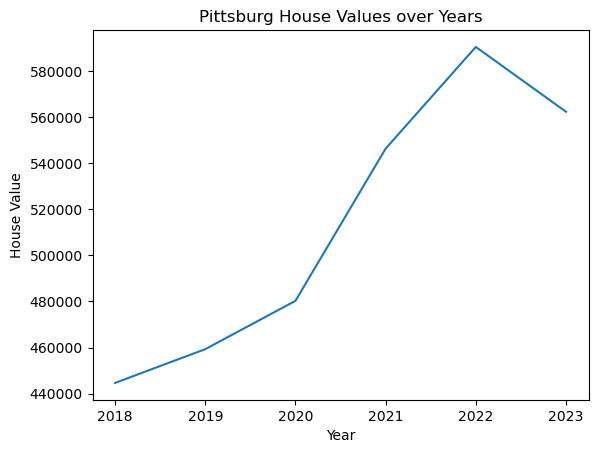

In [231]:
#create a function that can visualize the house value change over years by selected city
city = []
for i in house_values_year['City']:
    city.append(i)
    
def city_house_chart(cityname):
    for i in city:
        if i == cityname:
            house_trans[i].plot(y=i)
            plt.xlabel('Year')
            plt.ylabel('House Value')
            plt.title(f'{i} House Values over Years')
            plt.show()

city_house_chart('Pittsburg')